# <center color='red'> BANK CARD EXERCISE </center>

### Enoncé du projet

Un responsable d’une banque souhaite réduire le nombre de clients qui quittent leurs services de carte de crédit. Il aimerait pouvoir anticiper le départ des clients afin de leur fournir de
meilleurs services et ainsi les retenir.
Votre travail sera de mettre en place un modèle de Machine Learning capable de prédire les
départs des clients. Pour cela, la banque met à votre disposition une base de données de 10127
clients. La variable cible est Attrition_Flag

#### Objectif: 

réduire le nombre de clients qui quittent leurs services de carte de crédit

#### Variable cible:

'Attrition_Flag' est la variable cible.

#### <a href='#chargement'>I) CHARGEMENT DU JEU DE DONNEES</a>

#### <a href='#preprocessing'>II) PREPROCESSING</a>

#### <a href='#modele'>III) MODELES UTILISEES</a>

#### <a href='#evaluation'>IV) EVALUATION DES MODELES</a>

In [4]:
#importation de la bibliothèque numpy
import numpy as np

#importation de la bibliothèque pandas
import pandas as pd

#importation des bibliothèques de visualisation (matplotlib et seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTATION DES OUTILS DE LA BIBLIOTHEQUE SCIKIT-LEARN 

#importation de l'outil de division d'un dataframe en trainset et testset
from sklearn.model_selection import train_test_split

#importation des métriques 
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

#importation des modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#importation d'une bibliothèque de gestion des erreurs
import warnings
warnings.filterwarnings('ignore') #pour ignorer les avertissements

## <div id='chargement'>I) CHARGEMENT DU JEU DE DONNEES</div> 

- Chargement du jeu de données

- Description du jeu de données

- Copie du dataset

- Suppression de la colonne CLIENTNUM

- Total des valeurs manquantes par variables

- Types de variables du dataset

- Affichage des colonnes du dataset

- Fonction qui extrait et liste les noms des variables qualitatives (object) de dataframe 

- Fonction qui extrait et liste les noms des variables quantitatives (float et int) de dataset

- Effectif de chaque modalité de chaque variable qualitative (type 'object')

In [5]:
#Chargement du dataset

df = pd.read_csv('Dataset.csv', sep = ';', na_values = 'Unknown') #On considère 'Unknown' comme valeur manquante
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


####  Description du jeu de données 

CLIENTNUM: Numéro client. Identifiant unique du client titulaire du compte


Attrition_Flag: Variable cible (activité client) - si le compte est fermé, 1 sinon
0


Customer_Age: Âge du client en années


Gender: Sexe du client (M = Homme, F = Femme)


Dependent_count: Nombre de personnes à charge


Education_Level: Niveau d'éducation


Marital_Status: situation maritale


Income_Category: Catégorie de revenu annuel


Card_Category: Type de carte


Months_on_book: Période de relation avec la banque


Total_Relationship_Count: Nombre total de produits détenus par le client


Months_Inactive_12_mon: Nombre de mois d'inactivité au cours des 12 derniers mois


Contacts_Count_12_mon: Nombre de contacts au cours des 12 derniers mois


Credit_Limit: Limite de crédit sur la carte de crédit


Total_Revolving_Bal: Solde renouvelable total sur la carte de crédit

In [6]:
#Copie du dataset

df = df.copy() 

In [7]:
#Suppression de la colonne CLIENTNUM qui représente les numéros attribués par la banque à chaque client.

df = df.drop('CLIENTNUM', 1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
#Total des valeurs manquantes ('Unknown') par variable. 

df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [9]:
#Types de variables du dataset

df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [10]:
#Affichage du nom des colonnes du dataset

df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
#Fonction qui extrait et liste les noms des variables qualitatives (object) de dataframe 

def qualitative_extraction(Dataframe):  
    liste = []
    for col in df.select_dtypes('object'):
        liste.append(col)
    print(liste)

In [12]:
quali = qualitative_extraction(df)
quali

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [13]:
#Fonction qui extrait et liste les noms des variables quantitatives (float et int) de dataset 

def quantitative_extraction(Dataframe):
    liste = []
    for col in Dataframe.select_dtypes('float64'):
        liste.append(col)
    for col in Dataframe.select_dtypes('int64'):
            liste.append(col)
    print(liste) 

In [14]:
quanti = quantitative_extraction(df)

['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [15]:
#Effectif de chaque modalité de chaque variable qualitative (type 'object')

for col in df.select_dtypes('object'):
    print((df[col].value_counts()))
    print('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------


## <div id='preprocessing'>II) PREPROCESSING </div> 

- Division du dataset (trainset & testset)

- Affichage de l'effectif des modalités de la variable cible 'Attrition_Flag' dans le trainset.

- Affichage de l'effectif des modalités de la variable cible 'Attrition_Flag' dans le testset.

- Encodage des variables qualitatives

- Imputation des individus ayant des valeurs manquantes dans leur profil

- Preprocessing (basique)

In [16]:
#Division du dataset (trainset & testset)

trainset, testset = train_test_split(df, test_size=0.3, random_state=0) #le testset vaut 30% du dataset

In [17]:
#Affichage de l'effectif des modalités de la variable cible 'Attrition_Flag' dans le trainset.
#(pour voir si le ratio des effectifs du dataset est respecté après le découpage)

trainset['Attrition_Flag'].value_counts()

Existing Customer    5917
Attrited Customer    1171
Name: Attrition_Flag, dtype: int64

In [18]:
#Affichage de l'effectif des modalités de la variable cible 'Attrition_Flag' dans le testset.
#(pour voir si le ratio des effectifs du dataset est respecté après le découpage)

testset['Attrition_Flag'].value_counts()

Existing Customer    2583
Attrited Customer     456
Name: Attrition_Flag, dtype: int64

In [19]:
#Fonction permettant d'encoder les variables qualitatives selon les modalités de chaque variable du dataset.

def encodage(dataframe):
    code = {
        'Attrited Customer':1, 'Existing Customer':0,
        'F':0, 'M':1,
        'Single':0, 'Married':1, 'Divorced':2, 
        'Less than $40K':0, '$40K - $60K':1,'$60K - $80K':2, '$80K - $120K':3, '$120K +':4,
        'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3,
        'Uneducated':0, 'College':1, 'High School':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5
    }
    for col in dataframe.select_dtypes('object').columns:
        dataframe.loc[:,col] = dataframe[col].map(code)
    
    return dataframe

In [20]:
#Fonction permettant d'imputer(supprimer) les individus possédant une valeur manquante dans leur profil.

def imputation(dataframe):
    return dataframe.dropna(axis=0)

In [21]:
#Fonction de preprocessing(basique) 

def preprocessing(dataframe):
    dataframe = encodage(dataframe)
    dataframe = imputation(dataframe)
    
    X = dataframe.drop('Attrition_Flag', axis=1)
    y = dataframe['Attrition_Flag']
    
    print(y.value_counts())
    
    return X,y

In [22]:
#Utilisation de la fonction de preprocessing sur le trainset

X_train, y_train = preprocessing(trainset)

0    4158
1     795
Name: Attrition_Flag, dtype: int64


In [23]:
#Utilisation de la fonction de preprocessing sur le testset

X_test, y_test = preprocessing(testset)

0    1810
1     318
Name: Attrition_Flag, dtype: int64


##  <div id='modele'>III) MODELES UTILISEES</div>

    
    
####  <a href='#decisiontree'>1) Arbre de décision</a>
####  <a href='#logreg'>2) Régression logistique</a>
####  <a href='#SVC_rbf'>3) SVM avec kernel = 'rbf'</a>
####  <a href='#randomforest'>4) Random Forest</a>
####  <a href='#bagging'>5) Bagging</a>
####  <a href='#boosting'>6) Boosting</a>
####  <a href='#kppv'>7) K-nearest neighborhood(K-plus proches voisins)</a>

## <div id='evaluation'> IV) EVALUATION DES MODELES</div>

In [41]:
#Fonction d'évaluation de modèles (au minimum deux(2) modèles) 

def evaluation(model_list):
    
    for model in model_list:
        model.fit(X_train, y_train)
        
        print('=='*70)
        print('EVALUATION DU MODELE:', model, "\n")

        y_train_pred = model.predict(X_train)
        print('La matrice de confusion du modèle pour le trainset est: \n', confusion_matrix(y_train, y_train_pred))
        print('\n Rapport total du modèle utilisé pour le trainset : \n')
        print(classification_report(y_train, y_train_pred), '\n\n')

        y_pred = model.predict(X_test)
        print('La matrice de confusion du modèle pour le testset est: \n', confusion_matrix(y_test, y_pred))
        print('\n Rapport total du modèle utilisé pour le testset : \n')
        print(classification_report(y_test, y_pred))

        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                    cv=5, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))
        plt.figure(figsize=(12,8))
        plt.title(f"Courbe train-test du modèle {model}")
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()        

In [42]:
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = LogisticRegression(random_state=0)
model_3 = SVC(kernel='rbf', random_state=0)
model_4 = RandomForestClassifier(random_state=0, n_estimators=100)
model_5 = BaggingClassifier(base_estimator= KNeighborsClassifier(), n_estimators=100, random_state=0)
model_6 = AdaBoostClassifier(n_estimators=100, random_state=0)
model_7 = KNeighborsClassifier(n_neighbors=100, algorithm='ball_tree', leaf_size = 40)

In [43]:
liste = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]

EVALUATION DU MODELE: DecisionTreeClassifier(random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[4158    0]
 [   0  795]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4158
           1       1.00      1.00      1.00       795

    accuracy                           1.00      4953
   macro avg       1.00      1.00      1.00      4953
weighted avg       1.00      1.00      1.00      4953
 


La matrice de confusion du modèle pour le testset est: 
 [[1736   74]
 [  61  257]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1810
           1       0.78      0.81      0.79       318

    accuracy                           0.94      2128
   macro avg       0.87      0.88      0.88      2128
weighted avg       0.94      0.94      0.94      2128

EV

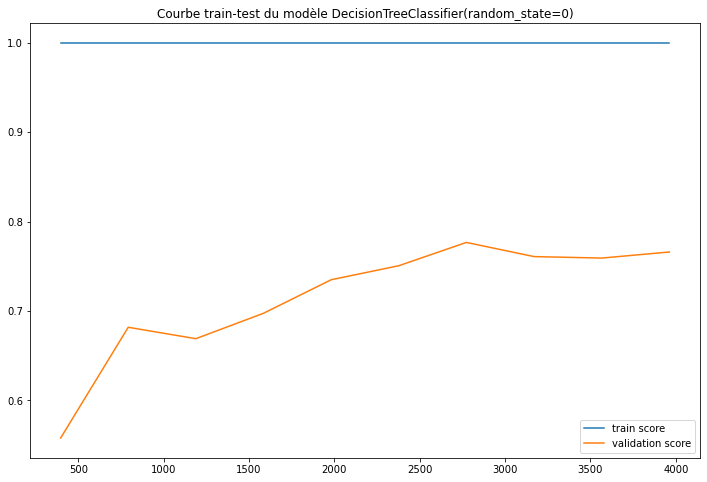

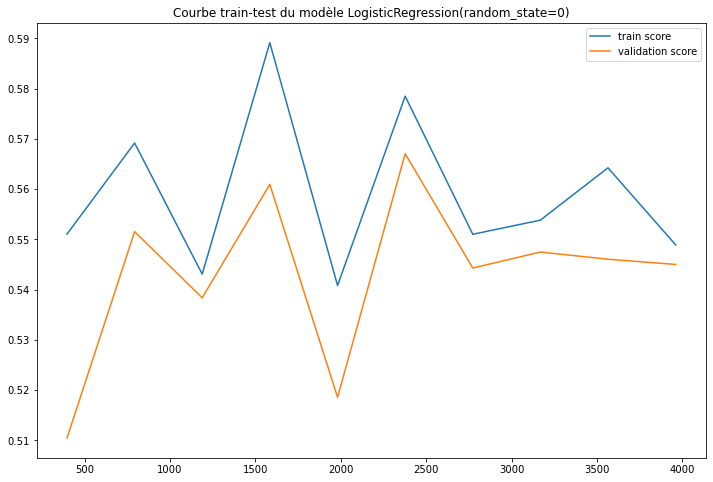

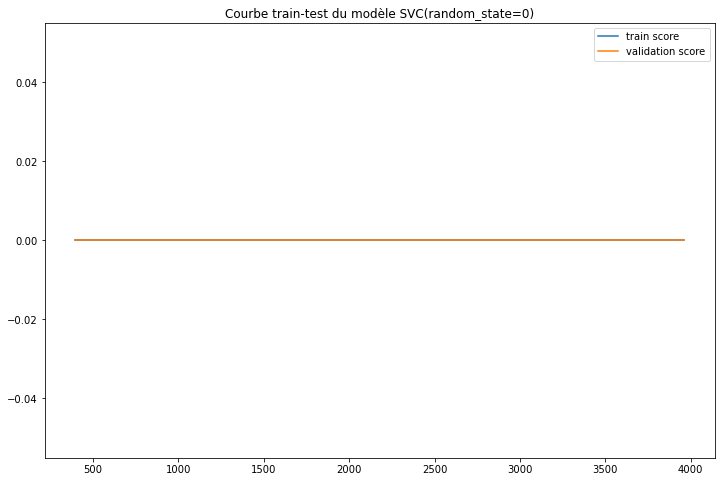

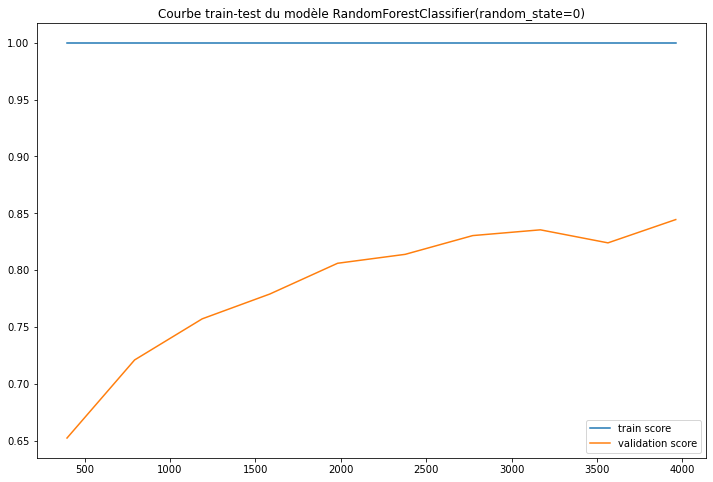

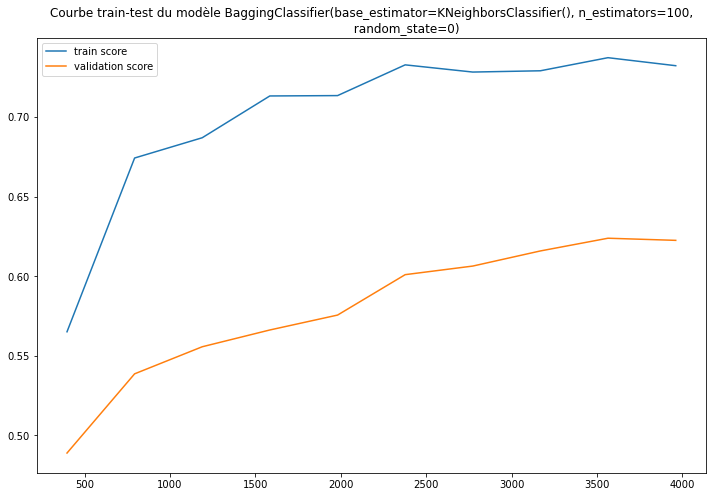

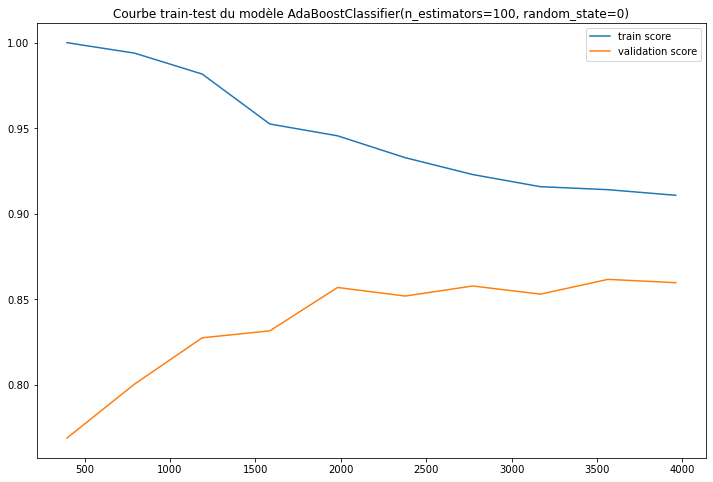

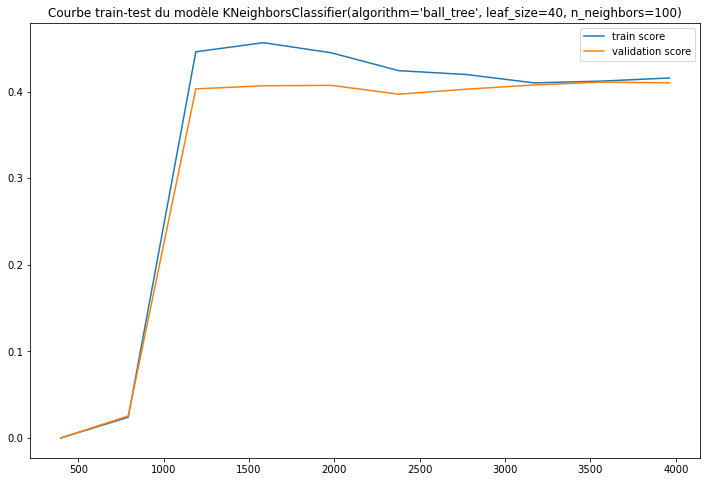

In [44]:
evaluation(liste)